In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

2024-12-12 17:07:24.709544: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Load saved training history
history_path = os.path.join("output", "training_history.npy")
history = np.load(history_path, allow_pickle=True).item()

# Load saved model
model_path = os.path.join("output", "scaden_model.keras")
model = tf.keras.models.load_model(model_path)

# Load test data
true_fractions_file = os.path.join("output", "true_fractions.csv")
predicted_fractions_file = os.path.join("output", "predicted_fractions.csv")
y_test = np.loadtxt(true_fractions_file, delimiter=",")
y_pred = np.loadtxt(predicted_fractions_file, delimiter=",")

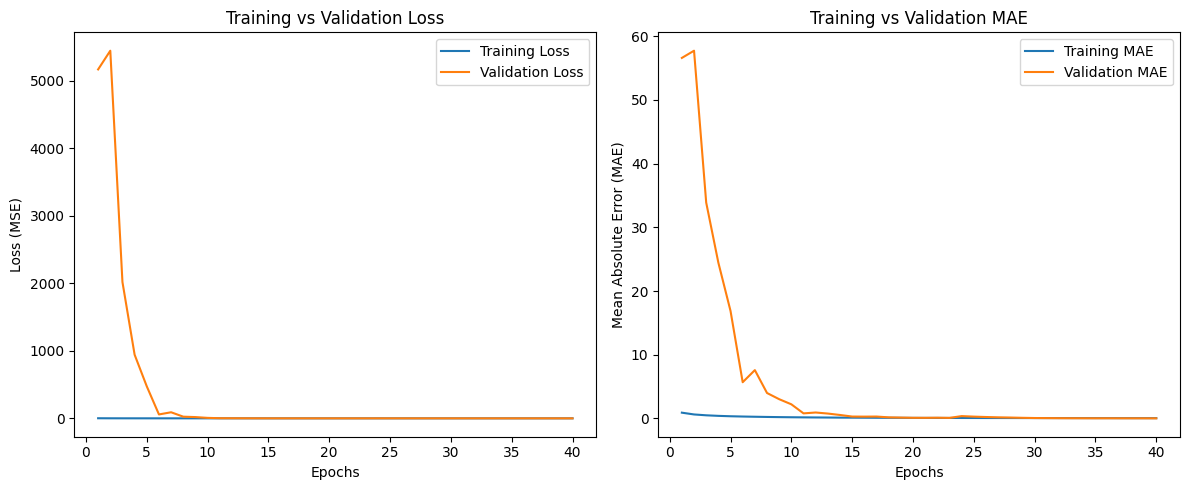

In [ ]:
## Plot Training vs Validation Loss and MAE

loss = history['loss']
val_loss = history['val_loss']
mae = history['mae']
val_mae = history['val_mae']
epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training vs Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, mae, label='Training MAE')
plt.plot(epochs, val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training vs Validation MAE')
plt.legend()

plt.tight_layout()
plt.show()

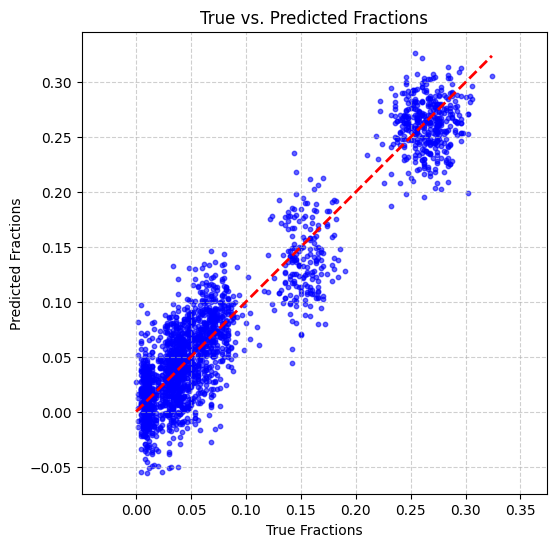

In [ ]:
## Plot True vs. Predicted Fractions

plt.figure(figsize=(6, 6))
plt.scatter(y_test.flatten(), y_pred.flatten(), alpha=0.6, color='blue', s=10)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='dashed', linewidth=2)
plt.title('True vs. Predicted Fractions')
plt.xlabel('True Fractions')
plt.ylabel('Predicted Fractions')
plt.axis('equal')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()